# Analyse Exploratoire des données

##### <i>Dataset : migrants disparus</i>
##### <i>Source : Kaggle </i>

### INTRODUCTION : 

L’analyse exploratoire des données est faite pour avoir  la compréhension de données avant d’entreprendre des analyses plus complexes.  Dans ce TP, nous allons utiliser des outils tels que Pandas et matplotlib.

### Importation des libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplcyberpunk


### Importation de données

In [8]:
data_path = r'E:\Documents\1. MyOffice\1. Private\7. Plan de developpement Personnel\3. Masters Et Certification\ISIG\06. Data Mining et Machine Learning\datasets\Global Missing Migrants Dataset.csv'
data = pd.read_csv(data_path)
df = data.copy()

In [9]:
df.head(3)

,Incident Type,Incident year,Reported Month,Region of Origin,Region of Incident,Country of Origin,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Cause of Death,Migration route,Location of death,Information Source,Coordinates,UNSD Geographical Grouping
0,Incident,2014,January,Central America,North America,Guatemala,1.0,0,1,0,0,1,0,Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.650259, -110.366453",Northern America
1,Incident,2014,January,Latin America / Caribbean (P),North America,Unknown,1.0,0,1,0,0,0,0,Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.59713, -111.73756",Northern America
2,Incident,2014,January,Latin America / Caribbean (P),North America,Unknown,1.0,0,1,0,0,0,0,Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.94026, -113.01125",Northern America


### Exploration

Notre de données fournit les informations des migrants disparus et de leurs périples tragiques vers des destinations internationales, collecté par le Projet Migrants Disparus, une initiative mise en œuvre par l'Organisation internationale pour les migrations (OIM) depuis 2014. Cet ensemble de données documente les décès et les disparitions, mettant en lumière les difficultés rencontrées par les migrants durant leur périple.

##### <i>la taille de la bd</i>

In [13]:
print(df.shape) # la taille de la bd ( lignes et colonnes)
print(df.size) # le nombre d'elements de la bd
print()

(13020, 19)
247380



##### <i>liste des variables / colonnes de la bd et type des variables </i>

In [15]:
print(df.dtypes)
print()

Incident Type                           object
Incident year                            int64
Reported Month                          object
Region of Origin                        object
Region of Incident                      object
Country of Origin                       object
Number of Dead                         float64
Minimum Estimated Number of Missing      int64
Total Number of Dead and Missing         int64
Number of Survivors                      int64
Number of Females                        int64
Number of Males                          int64
Number of Children                       int64
Cause of Death                          object
Migration route                         object
Location of death                       object
Information Source                      object
Coordinates                             object
UNSD Geographical Grouping              object
dtype: object



### Valuers Manquantes

##### <i>les nombres des valeurs manquantes pour chaque colonnes </i>

In [18]:
print(df.isna().sum())
print()

Incident Type                             0
Incident year                             0
Reported Month                            0
Region of Origin                         22
Region of Incident                        0
Country of Origin                         8
Number of Dead                          550
Minimum Estimated Number of Missing       0
Total Number of Dead and Missing          0
Number of Survivors                       0
Number of Females                         0
Number of Males                           0
Number of Children                        0
Cause of Death                            0
Migration route                        3021
Location of death                         0
Information Source                        8
Coordinates                              36
UNSD Geographical Grouping                1
dtype: int64



##### <i>les nombres des valeurs manquantes pour chaque colonnes en ( % ) </i>

In [20]:
print(df.isna().mean()*100)
print()

Incident Type                           0.000000
Incident year                           0.000000
Reported Month                          0.000000
Region of Origin                        0.168971
Region of Incident                      0.000000
Country of Origin                       0.061444
Number of Dead                          4.224270
Minimum Estimated Number of Missing     0.000000
Total Number of Dead and Missing        0.000000
Number of Survivors                     0.000000
Number of Females                       0.000000
Number of Males                         0.000000
Number of Children                      0.000000
Cause of Death                          0.000000
Migration route                        23.202765
Location of death                       0.000000
Information Source                      0.061444
Coordinates                             0.276498
UNSD Geographical Grouping              0.007680
dtype: float64



In [21]:
df.isna().all() # les colonnes entièrement vide

Incident Type                          False
Incident year                          False
Reported Month                         False
Region of Origin                       False
Region of Incident                     False
Country of Origin                      False
Number of Dead                         False
Minimum Estimated Number of Missing    False
Total Number of Dead and Missing       False
Number of Survivors                    False
Number of Females                      False
Number of Males                        False
Number of Children                     False
Cause of Death                         False
Migration route                        False
Location of death                      False
Information Source                     False
Coordinates                            False
UNSD Geographical Grouping             False
dtype: bool

In [22]:
df.isna().all(axis = 1) # les lignes entièrement vide
print()

In [23]:
df.columns

Index(['Incident Type', 'Incident year', 'Reported Month', 'Region of Origin',
       'Region of Incident', 'Country of Origin', 'Number of Dead',
       'Minimum Estimated Number of Missing',
       'Total Number of Dead and Missing', 'Number of Survivors',
       'Number of Females', 'Number of Males', 'Number of Children',
       'Cause of Death', 'Migration route', 'Location of death',
       'Information Source', 'Coordinates', 'UNSD Geographical Grouping'],
      dtype='object')

### Nettoyage des donnees

Nous allons commencer par garder les variables qui vont nous servir dans les analyses et eliminer les autres avec la methode drop() de pandas

In [26]:
df = df.drop(['Incident Type','Total Number of Dead and Missing', 'Cause of Death', 'Migration route', 'Location of death', 'Information Source', 'Coordinates', 'UNSD Geographical Grouping'], axis = 1)
print()

## Statistics avec groupby() et values_counts()

Nous allons utiliser groupby() et value_vounts pour regrouper les données et faire  d’opérations de calcul sur ces groupes.

In [72]:
# le nbr total des migrants
df['Nbr des migrants'] = df['Number of Dead'] + df['Minimum Estimated Number of Missing'] + df['Number of Survivors']

In [30]:
# le nombre total d'incidents
df['Incident year'].count()

13020

In [31]:
# le nbr total d'incidents par années
df.groupby(['Incident year'])['Incident year'].value_counts()

Incident year
2014     296
2015     821
2016    1277
2017    1341
2018    1637
2019    1804
2020    1296
2021    1800
2022    2183
2023     565
Name: count, dtype: int64

In [32]:
# le nbr total d incidents par region d'origine des migrants
df['Region of Origin'].value_counts()

Region of Origin
Latin America / Caribbean (P)    2164
Southern Asia                    1904
Unknown                          1737
Central America                  1565
Sub-Saharan Africa (P)           1528
Eastern Africa (P)               1133
Northern Africa                   452
Western Asia                      432
South America                     322
Eastern Africa                    298
Caribbean                         278
Western / Southern Asia (P)       245
Western Africa                    229
Northern Africa (P)               122
Sub-Saharan Africa                116
Mixed                             111
Southern Asia (P)                  90
South-eastern Asia                 68
Western Africa (P)                 52
Middle Africa                      51
South America (P)                  18
Europe                             14
Western / Southern Asia            14
Western Asia (P)                   12
Eastern Asia                       11
Caribbean (P)                    

In [33]:
# le nbr total d incident par region
incident_by_region = df['Region of Incident'].value_counts()
incident_by_region

Region of Incident
North America         2706
Mediterranean         2055
Northern Africa       2014
Southern Asia         1673
Central America       1375
Western Africa         967
Europe                 619
Eastern Africa         489
Western Asia           414
South-eastern Asia     237
South America          209
Caribbean              160
Middle Africa           75
Southern Africa         16
Eastern Asia            10
Central Asia             1
Name: count, dtype: int64

In [34]:
#le nbre total des decés
deces = df['Number of Dead'].sum()
deces

32718.0

In [35]:
# le bbre total des survivants
survivant = df['Number of Survivors'].sum()
survivant

85330

In [36]:
# le total des Pers disparues
disparues = df['Minimum Estimated Number of Missing'].sum()
disparues

24795

In [80]:
# le nbr total des migrants par region d'origine
df.groupby(['Region of Origin'])['Nbr des migrants'].sum()

Region of Origin
Caribbean                         1932.0
Caribbean (P)                      168.0
Central America                   4023.0
Central America (P)                339.0
Central Asia                        76.0
Eastern Africa                    7074.0
Eastern Africa (P)                5194.0
Eastern Asia                       111.0
Eastern Asia (P)                    19.0
Europe                              63.0
Latin America / Caribbean (P)     4341.0
Middle Africa                     1254.0
Mixed                            11246.0
Northern Africa                   5189.0
Northern Africa (P)               1564.0
Northern America                     2.0
Oceania                           1051.0
South America                     1153.0
South America (P)                   40.0
South-eastern Asia                4794.0
South-eastern Asia (P)              18.0
Southern Africa                     23.0
Southern Asia                     6446.0
Southern Asia (P)                  575.0

In [37]:
total_migrant = deces + survivant + disparues
total_migrant

142843.0

### VISUALISATION

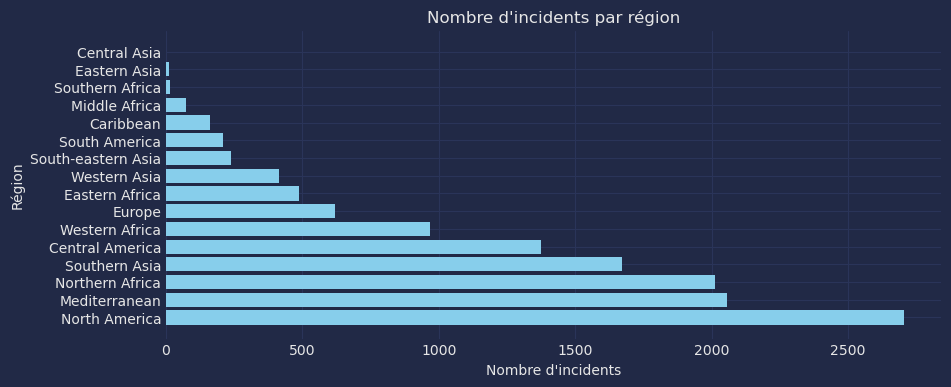

In [39]:
with plt.style.context('cyberpunk'):
    incident_by_region = df['Region of Incident'].value_counts()
    x = incident_by_region.index.tolist()
    y = incident_by_region.values.tolist()
    
    
    fig, ax = plt.subplots(figsize=(10, 4))
    
    ax.barh(x, y, color='skyblue')
    
    
    ax.set_title("Nombre d'incidents par région")
    ax.set_xlabel("Nombre d'incidents")
    ax.set_ylabel("Région")

### deces par region

In [41]:
deces_by_region = df[['Region of Incident','Number of Dead']].groupby('Region of Incident')['Number of Dead'].sum()
deces_by_region = deces_by_region.sort_values()

In [42]:
x = deces_by_region.index.tolist()
y = deces_by_region.values.tolist()

In [43]:
fig, ax = plt.subplots(figsize =(10,4))
ax.barh(x,y, color = 'b')

<BarContainer object of 16 artists>